# Libraries

In [1]:
import os
import pickle
from functools import reduce
from operator import mul

In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.regression.linear_model import OLS
from sklearn import linear_model
from sklearn.decomposition import PCA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
np.random.seed(0)

In [11]:
%matplotlib inline

In [ ]:
# import holoviews as hv
# import hvplot
# import hvplot.pandas

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
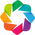

In [2]:
# np.random.seed(42)
# hv.extension('bokeh')

In [12]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

# Porfolio Data

In [4]:
# portfolio_path = os.path.join("..","Data","100_Portfolios_10x10_Daily.p")

In [20]:
# # To download the data yourself
# try:
#     portfolios = pickle.load(open( portfolio_path, "rb" ))
# except:
portfolios = web.DataReader('100_Portfolios_10x10_Daily', 'famafrench')
# pickle.dump(pf, open(portfolio_path, "wb"))
# portfolios = portfolios[0]

In [22]:
portfolios[1].head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2.51,2.95,1.15,1.39,2.30,1.38,1.06,1.41,1.91,1.95,...,1.23,1.38,1.35,1.78,1.64,1.28,2.20,1.83,4.43,4.49
2010-01-05,-0.42,0.58,-0.95,-0.37,-0.33,0.37,-0.61,-0.52,0.08,0.44,...,-0.04,0.02,-0.08,0.22,0.40,0.15,0.78,0.34,3.66,4.32
2010-01-06,-0.02,0.32,0.70,-0.43,0.63,0.16,0.09,0.09,0.05,0.34,...,0.27,0.11,0.24,0.21,-0.17,-0.01,0.45,0.61,1.28,1.11
2010-01-07,1.19,0.90,1.84,0.40,1.33,1.01,0.74,1.43,1.40,1.60,...,-0.01,0.49,0.43,-0.05,0.15,1.92,1.25,0.00,1.45,0.21
2010-01-08,0.60,-0.07,0.84,1.43,1.50,1.42,1.16,0.84,1.11,1.72,...,0.50,0.24,0.82,0.67,0.72,0.16,-0.27,0.07,-2.04,-1.01


![Fama/French Benchmark Portfolio](../Media/fama-french-benchmark-portfolios.png)

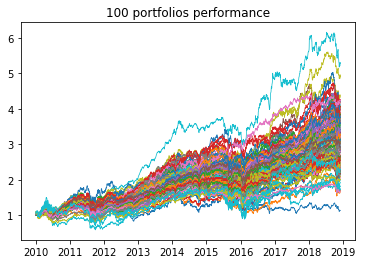

In [26]:
# pd.melt(portfolios[1].head(100).divide(100).add(1).cumprod().reset_index(), 
#         id_vars='Date').hvplot.line(x='Date', by='variable')

plt.plot(portfolios[1].divide(100).add(1).cumprod(), linewidth=0.75);
plt.title('100 portfolios performance')
plt.show()

In [27]:
portfolios[1] = portfolios[1].divide(100)

# Factors Data

In [9]:
five_factor_path = os.path.join("..","Data","F-F_Research_Data_5_Factors_2x3_daily.p")

In [33]:
# To download the data yourself
# try:
#     factors = pickle.load(open( five_factor_path, "rb" ))
# except:
factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
# pickle.dump(ft, open( five_factor_path, "wb"))

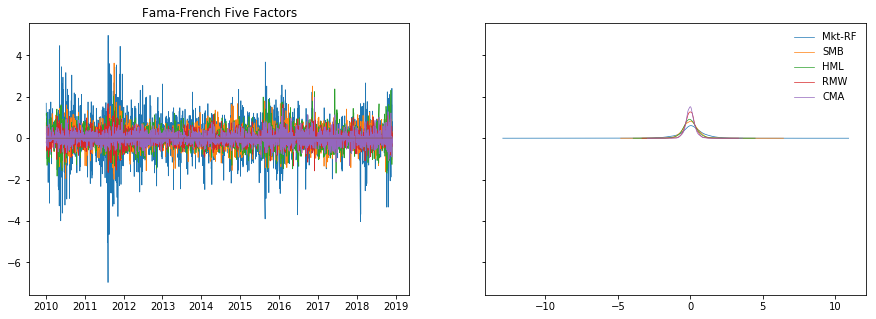

In [49]:
plt.rcParams['figure.figsize'] = [15,5]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.plot(factors, linewidth=0.75);
ax1.set_title('Fama-French Five Factors')
factors.iloc[:,0].plot.kde(ax=ax2, linewidth=0.7);
factors.iloc[:,1].plot.kde(ax=ax2, linewidth=0.7);
factors.iloc[:,2].plot.kde(ax=ax2, linewidth=0.7);
factors.iloc[:,3].plot.kde(ax=ax2, linewidth=0.7);
factors.iloc[:,4].plot.kde(ax=ax2, linewidth=0.7);
plt.legend(labels=factors.columns, frameon=False, title=None)
plt.show()

In [50]:
# pd.melt(factors[0].head(100).divide(100).add(1).cumprod().reset_index(), 
#         id_vars='Date').hvplot.line(x='Date', by='variable')

## i. Covariance of Factors

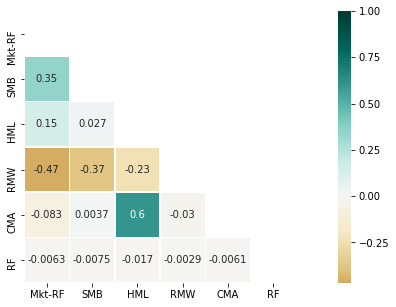

In [75]:
# Correlogram
corr = factors.corr()

# Generating mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, annot=True, center=0, square=True, linewidths=0.5, cmap="BrBG", mask=mask);

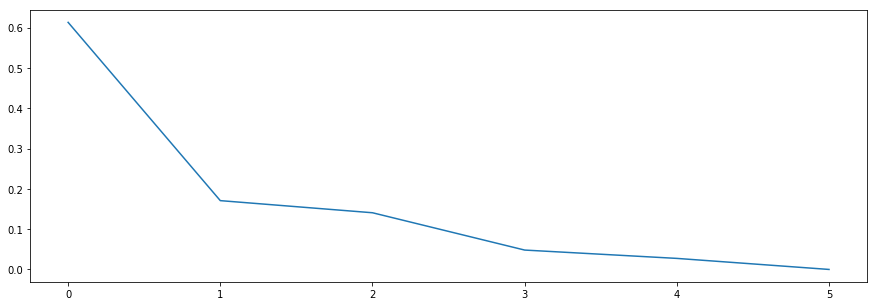

In [76]:
pca_factors = PCA()
pca_factors.fit(factors.dropna())

pd.Series(pca_factors.explained_variance_ratio_,name='Variance_Explained').plot(label='Scree Plot of PCA Variance Explaned (%)');
#.redim(Variance_Explained={'range': (0, 1)})

# Modeling

In [78]:
# We must make sure we have an overlapping dataset
dates = np.intersect1d(factors.index, portfolios[1].index)
factors = factors.loc[dates,:]
portfolios[1] = portfolios[1].loc[dates,:]

## ii. Analyzing Weight Space

In [79]:
factors = factors.loc[~factors.isna().any(1)&~portfolios[1].isna().any(1),:]
portfolios[1] = portfolios[1].loc[~factors.isna().any(1)&~portfolios[1].isna().any(1),:]

In [80]:
lm = linear_model.LinearRegression(normalize=True)
lm.fit(X=factors, y=portfolios[1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [82]:
pca = PCA(n_components=2)

beta_comp = pca.fit_transform(lm.coef_)
beta_comp = pd.DataFrame(beta_comp, columns=['weight_comp1','weight_comp2'], index=portfolios[1].columns)
beta_comp = beta_comp.reset_index()

labels = pd.Series(portfolios[1].columns).str.split(' ', 1, expand=True)
labels.columns = ['market equity','two']

beta_comp = pd.concat([beta_comp,labels], axis=1)

print(f'This is the feature importance of our two components: \n\n{pca.explained_variance_ratio_}s')

This is the feature importance of our two components: 

[0.98032558 0.00849768]s


In [19]:
%%opts Scatter [tools=['hover'], height=400, width=600] (size=5 alpha=0.5)
# hv.Scatter(beta_comp, kdims = ['weight_comp1'], vdims = ['weight_comp2', 'market equity', 'two']).options(color_index='market equity') + \
# hv.Scatter(beta_comp, kdims = ['weight_comp1'], vdims = ['weight_comp2', 'market equity', 'two']).options(color_index='two')

:Layout
   .Scatter.I  :Scatter   [weight_comp1]   (weight_comp2,market equity,two)
   .Scatter.II :Scatter   [weight_comp1]   (weight_comp2,market equity,two)

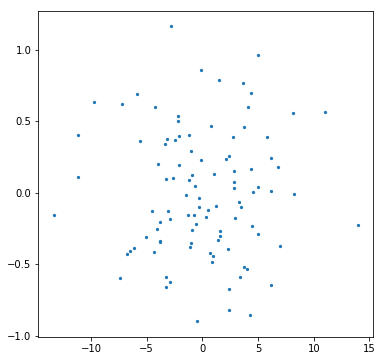

In [91]:
plt.rcParams['figure.figsize'] = [6,6]
plt.scatter(x=beta_comp.weight_comp1, y=beta_comp.weight_comp2, s=5);

## iii. Testing Significance of F-F 5-Factor

In [84]:
portfolio_returns = pd.melt(portfolios[1].reset_index(), id_vars='Date').drop(columns=['variable']).merge(factors.dropna(), how='left', on='Date').drop(columns=['Date'])

portfolio_returns.head()

,value,Mkt-RF,SMB,HML,RMW,CMA,RF
0,0.0251,0.0169,0.0075,0.0112,-0.0022,0.0021,0.0
1,-0.0042,0.0031,-0.0037,0.0122,-0.0011,0.0018,0.0
2,-0.0002,0.0013,-0.0016,0.0052,-0.0003,0.0020,0.0
3,0.0119,0.0040,0.0024,0.0094,-0.0062,0.0023,0.0
4,0.0060,0.0033,0.0034,0.0001,0.0025,-0.0038,0.0


In [85]:
model = OLS(portfolio_returns.value-portfolio_returns.RF,portfolio_returns.drop(columns=['value','RF']))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.513e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        07:03:16   Log-Likelihood:             8.2517e+05
No. Observations:              224500   AIC:                        -1.650e+06
Df Residuals:                  224495   BIC:                        -1.650e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.9926      0.002    624.455      0.000       0.989       0.996
SMB            0.5741      0.003    207.382      0.000       0.569       0.580
HML            0.1593      0.003     45.764      0.000       0.152       0.166
RMW           -0.0941      0.005    -20.817      0.000      -0.103      -0.085
CMA           -0.0165      0.006     -2.980      0.003      -0.027      -0.006
==============================================================================
Omnibus:                    40355.851   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           663381.646
Skew:                           0.388   Prob(JB):                         0.00
Kurtosis:                      11.386   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""